In [79]:
import pandas as pd

attendence = pd.read_csv("birreria-2015-attendance.csv")
sales = pd.read_csv("birreria-2015-sales.csv")

In [80]:
attendence.head(10)

,date,check_count,cover_count
0,150106,141,294
1,150108,131,270
2,150131,366,755
3,150202,87,146
4,150209,90,160
5,150211,165,309
6,150306,308,507
7,150308,327,620
8,150313,398,707
9,150315,265,526


In [103]:
attendence[["check_count","cover_count"]].corr(method = "pearson")

,check_count,cover_count
check_count,1.000000,0.966682
cover_count,0.966682,1.000000


total tables sold that day is highly correlated to total number of people spend money that day.

In [104]:
attendence["ratio"] = attendence["check_count"]/attendence["cover_count"]
attendence.head()

,date,check_count,cover_count,ratio
0,150106,141,294,0.479592
1,150108,131,270,0.485185
2,150131,366,755,0.484768
3,150202,87,146,0.595890
4,150209,90,160,0.562500


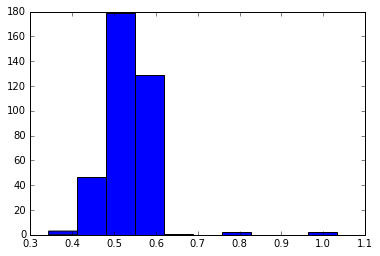

In [106]:
plt.hist(attendence["ratio"])
plt.show()

In [ ]:
In most of time, two people per table spent money on a certain day

In [114]:
date = attendence["date"]


In [123]:
date = date.apply(str)

def to_month(string):
    return int(string[2:4])
month_attendence = date.apply(to_month)
attendence['month'] = month_attendence
attendence.head()

,date,check_count,cover_count,ratio,Month,month
0,150106,141,294,0.479592,1,1
1,150108,131,270,0.485185,1,1
2,150131,366,755,0.484768,1,1
3,150202,87,146,0.595890,2,2
4,150209,90,160,0.562500,2,2


In [124]:
bymonth_att = attendence.groupby("month")
ratio_month = bymonth_att["ratio"].mean()
ratio_month

month
1     0.506030
2     0.536783
3     0.524705
4     0.549382
5     0.572917
6     0.559359
7     0.555827
8     0.549887
9     0.537181
10    0.516658
11    0.495460
12    0.493866
Name: ratio, dtype: float64

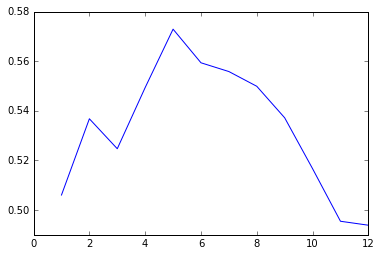

In [126]:
plt.plot(ratio_month)
plt.show()

it is interesting that number per table who spent money reach peak at may and june. However, trending down when the fall and winter are coming. It might due to in may and june, it is more about friend getting together while in christmas and thanksgiving, it is more about family time! it is worth to note the sales in december also reach its peak.

In [81]:
sales.head(10)

,date,category,net_sales,net_discounts
0,150114,Beverage,5351.29,-19.83
1,150117,Beverage,13367.35,-105.88
2,150120,Beverage,4683.83,-79.52
3,150123,Beverage,8621.61,-48.15
4,150215,Beverage,9126.48,-25.35
5,150218,Beverage,5202.57,-49.46
6,150221,Beverage,9695.04,-43.76
7,150224,Beverage,3852.84,-249.00
8,150316,Beverage,6141.26,-84.56
9,150319,Beverage,10186.16,-26.52


In [82]:
bycategory = sales.groupby("category")

In [83]:
bycategory["net_sales"].describe()

category       
Beverage  count      363.000000
          mean     11138.448182
          std       4784.523896
          min          0.000000
          25%       7400.440000
          50%      11137.580000
          75%      14374.595000
          max      24751.040000
Food      count      361.000000
          mean     13263.465042
          std       4992.774187
          min          0.000000
          25%       9724.000000
          50%      13515.000000
          75%      17057.600000
          max      33031.800000
Other     count       48.000000
          mean        32.192083
          std       1789.418057
          min      -2776.320000
          25%       -131.795000
          50%        -38.500000
          75%         -5.250000
          max      11686.640000
Unknown   count      160.000000
          mean       421.501625
          std        845.028542
          min          0.000000
          25%        125.065000
          50%        339.300000
          75%        493

category
Beverage    4043256.69
Food        4788110.88
Other          1545.22
Unknown       67440.26
Name: net_sales, dtype: float64


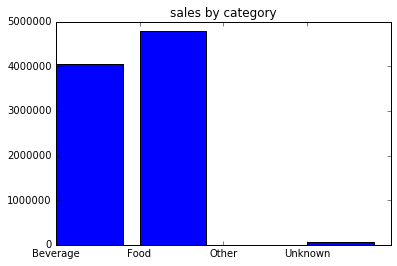

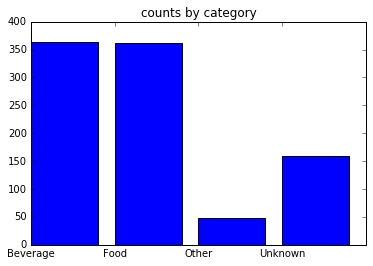

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
sum_cat = bycategory["net_sales"].sum()
print(sum_cat)
plt.bar(range(len(sum_cat)),sum_cat,tick_label = sum_cat.index)
plt.title("sales by category")
plt.show()
count_cat = bycategory["net_sales"].count()
plt.bar(range(len(count_cat)),count_cat,tick_label = count_cat.index)
plt.title("counts by category")
plt.show()



We can see from the summary by category that the sales performance of beverage and food are the highest. the number of transactions of beverage is higher however the average and median of revenue of food is higher. therefore, I will focus mainly on the category of beverage and food later on.

In [85]:
sales.shape

(932, 4)

In [102]:
beverage = sales[sales["category"] == "Beverage"]
beverage[["net_sales","net_discounts"]].corr(method = "pearson")

,net_sales,net_discounts
net_sales,1.000000,-0.244149
net_discounts,-0.244149,1.000000


we can see that net sales and net discounts are correlated but weakly correlated.

In [86]:

date_beverage = beverage["date"]

In [87]:

date_beverage = date_beverage.apply(str)

def to_month(string):
    return int(string[2:4])
month_beverage = date_beverage.apply(to_month)
beverage['Month'] = month_beverage

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [88]:
beverage.head()

,date,category,net_sales,net_discounts,Month
0,150114,Beverage,5351.29,-19.83,1
1,150117,Beverage,13367.35,-105.88,1
2,150120,Beverage,4683.83,-79.52,1
3,150123,Beverage,8621.61,-48.15,1
4,150215,Beverage,9126.48,-25.35,2


In [92]:
bymonth = beverage.groupby("Month")
month_sale = bymonth["net_sales"].sum()
month_sale

Month
1     198550.56
2     191003.68
3     249155.53
4     390912.68
5     475460.74
6     411876.84
7     384434.73
8     399113.58
9     363674.54
10    307994.23
11    248897.07
12    422182.51
Name: net_sales, dtype: float64

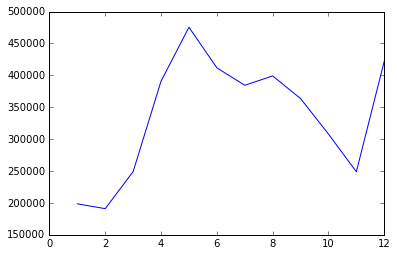

In [91]:
plt.plot(month_sale)
plt.show()

As we can see from the graph above, the sale of beverage reach its peak in May and Jun. I guess it is because it is graduation season and summer is coming. In Febueray, the sales also reach its peak.

In [93]:
food = sales[sales["category"] == "Food"]
date_food = food["date"]
date_food = date_food.apply(str)

def to_month(string):
    return int(string[2:4])
month_food = date_food.apply(to_month)
food['Month'] = month_food

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [94]:
food.head()

,date,category,net_sales,net_discounts,Month
45,150106,Food,5979.00,-50.00,1
46,150109,Food,8175.80,-79.20,1
47,150112,Food,6822.65,-17.35,1
48,150204,Food,8114.00,-76.00,2
49,150207,Food,13515.00,-112.00,2


Month
1     198550.56
2     191003.68
3     249155.53
4     390912.68
5     475460.74
6     411876.84
7     384434.73
8     399113.58
9     363674.54
10    307994.23
11    248897.07
12    422182.51
Name: net_sales, dtype: float64


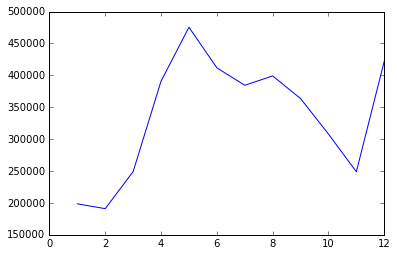

In [97]:
bymonth_beverage = beverage.groupby("Month")
month_sale_beverage = bymonth_beverage["net_sales"].sum()
month_sale_beverage
print(month_sale_beverage)
plt.plot(month_sale_beverage)
plt.show()

Similary, the sales of food also reach its peak at May, June and Dec. It seems, when people order drink, they also order food. Now let's look at discount.

In [98]:
bycategory["net_discounts"].describe()

category       
Beverage  count     363.000000
          mean      -84.692920
          std        84.990465
          min      -629.000000
          25%      -110.325000
          50%       -64.180000
          75%       -27.055000
          max         0.000000
Food      count     361.000000
          mean     -132.376953
          std       136.416725
          min     -1467.000000
          25%      -167.000000
          50%       -93.000000
          75%       -59.000000
          max         0.000000
Other     count      48.000000
          mean        0.000000
          std         0.000000
          min         0.000000
          25%         0.000000
          50%         0.000000
          75%         0.000000
          max         0.000000
Unknown   count     160.000000
          mean       -0.009312
          std         0.117795
          min        -1.490000
          25%         0.000000
          50%         0.000000
          75%         0.000000
          max         0

category
Beverage   -30743.53
Food       -47788.08
Other           0.00
Unknown        -1.49
Name: net_discounts, dtype: float64


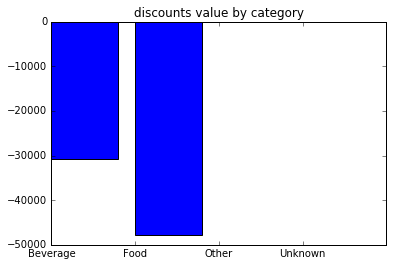

In [100]:
sum_cat = bycategory["net_discounts"].sum()
print(sum_cat)
plt.bar(range(len(sum_cat)),sum_cat,tick_label = sum_cat.index)
plt.title("discounts value by category")
plt.show()


We can see that most of discounts concentrate on beverage and food. For values, food has more discount tba beverage.